# Aggregating benchmark runs

In [1]:
import pathlib
import typing

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes

from datasets.benchmarks.gpgpu import gpgpu_pb2

In [2]:
LOGDIR = pathlib.Path('/tmp/phd/datasets/benchmarks/gpgpu')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

240 files


In [3]:
def KernelInvocationToRow(log: gpgpu_pb2.GpgpuBenchmarkRun, ki: gpgpu_pb2.OpenClKernelInvocation):
    return {
        'date': labdate.DatetimeFromMillisecondsTimestamp(log.ms_since_unix_epoch),
        'suite': log.benchmark_suite,
        'benchmark': log.benchmark_name,
        'dataset': log.dataset_name,
        'device_type': log.device_type,
        'kernel': ki.kernel_name,
        'global_size': ki.global_size,
        'local_size': ki.local_size,
        'runtime_ms': ki.runtime_ms,
        'transferred_bytes': ki.transferred_bytes,
    }

def LogsToTable(logs: typing.Iterator[gpgpu_pb2.GpgpuBenchmarkRun]):
    rows = []
    for log in logs:
        rows += [KernelInvocationToRow(log, ki) for ki in log.kernel_invocation]
    return pd.DataFrame(rows, columns=[
        'date',
        'suite',
        'benchmark',
        'dataset',
        'device_type',
        'kernel',
        'global_size',
        'local_size',
        'runtime_ms',
        'transferred_bytes',
    ])

df = LogsToTable(pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
                 for log in LOGDIR.iterdir())
df

,date,suite,benchmark,dataset,device_type,kernel,global_size,local_size,runtime_ms,transferred_bytes
0,2019-02-09 11:42:50.065,amd-app-sdk-3.0,MatrixMultiplication,default,cpu,mmmKernel,256,64,0.339917,49152
1,2019-02-09 12:05:04.498,shoc-1.1.5,Scan,default,cpu,reduce,16384,256,1.543184,4194560
2,2019-02-09 13:09:58.376,nvidia-4.2,BlackScholes,default,gpu,BlackScholes,61440,128,13.238752,80000000
3,2019-02-09 11:45:14.924,npb-3.3,ep.A,A,cpu,embar,4096,64,1976.888103,6144
4,2019-02-09 12:02:30.987,rodinia-3.1,hotspot,default,cpu,hotspot,473344,256,10.586597,3145728
5,2019-02-09 13:00:15.203,amd-app-sdk-3.0,SobelFilter,default,gpu,sobel_filter,262144,256,0.352064,2097152
6,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,28.066957,30901580
7,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.812718,30901580
8,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.795191,30901580
9,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.879362,30901580


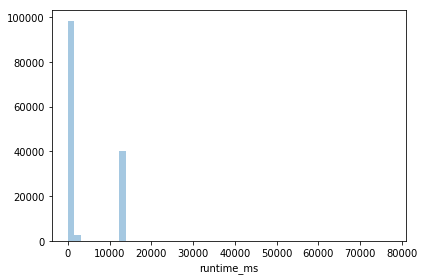

In [4]:
sns.distplot(df.runtime_ms, kde=False)
viz.finalise()

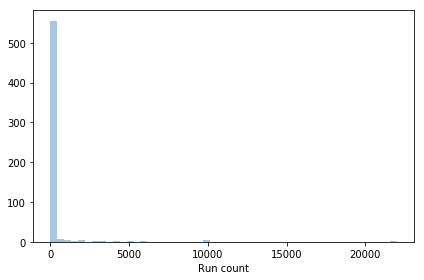

In [5]:
num_runs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()['runtime_ms']
sns.distplot(num_runs, kde=False)
plt.xlabel('Run count')
viz.finalise()

In [ ]:
# Sanity check that features are the same across runs.
# TODO(cec): Do we care about global and local sizes being consistent?

def ColumnIsConstantAcrossRuns(df, col):
    """Check that column is consistent across all runs from all devices."""
    mins = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).min()[col]
    maxs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).max()[col]
    mean = (mins == maxs).mean()
    if mean != 1:
        print(f'{mean:.1%} of {col} values are constant')
    return mean == 1

assert ColumnIsConstantAcrossRuns(df, 'transferred_bytes')

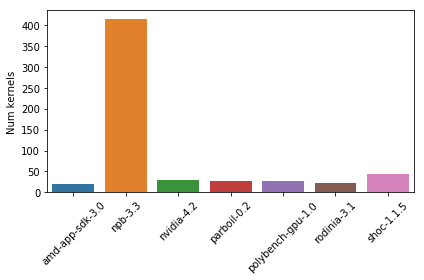

In [32]:
def RotateXLabels(rotation: int = 90, ax=None):
  ax = ax or plt.gca()
  plt.setp(ax.get_xticklabels(), rotation=rotation)

sns.barplot(x='suite', y='global_size', 
            data=df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).mean().groupby(['suite']).count().reset_index())
plt.ylabel('Num kernels')
RotateXLabels(45)
plt.xlabel('')
viz.finalise()

In [11]:
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device_type']).mean()

global_size  \
suite           benchmark            kernel                          dataset device_type                
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default cpu          262144.0000   
                                     advancedSeparableConvolution    default cpu          262144.0000   
                BinomialOption       binomial_options                default cpu           16320.0000   
                                                                             gpu           16320.0000   
                BitonicSort          bitonicSort                     default cpu           16384.0000   
                                                                             gpu           16384.0000   
                BlackScholes         blackScholes                    default cpu           65536.0000   
                                                                             gpu           65536.0000   
                FastWalshTransform   fastWalshTransform              default cpu             512.0000   
                                                                             gpu             512.0000   
                FloydWarshall        floydWarshallPass               default cpu           65536.0000   
                                                                             gpu           65536.0000   
                Histogram            histogram256_vector             default cpu            8192.0000   
                MatrixMultiplication mmmKernel                       default cpu             256.0000   
                                                                             gpu             256.0000   
                MatrixTranspose      matrixTranspose                 default cpu             256.0000   
                                                                             gpu             256.0000   
                MonteCarloAsian      calPriceVega_Scalar             default gpu          524288.0000   
                                     calPriceVega_Vector             default cpu          131072.0000   
                PrefixSum            group_prefixSum                 default cpu            4096.0000   
                                                                             gpu            1024.0000   
                Reduction            reduce                          default cpu             256.0000   
                                                                             gpu             256.0000   
                ScanLargeArrays      ScanLargeArrays                 default cpu           16384.0000   
                                                                             gpu           16384.0000   
                                     blockAddition                   default cpu           32768.0000   
                                                                             gpu           32768.0000   
                                     prefixSum                       default cpu              64.0000   
                                                                             gpu              64.0000   
                SimpleConvolution    simpleNonSeparableConvolution   default cpu          262144.0000   
...                                                                                               ...   
shoc-1.1.5      S3D                  ratt10_kernel                   default cpu            8960.0000   
                                     ratt2_kernel                    default cpu            8960.0000   
                                     ratt3_kernel                    default cpu            8960.0000   
                                     ratt4_kernel                    default cpu            8960.0000   
                                     ratt5_kernel                    default cpu            8960.0000   
                                     ratt6_kernel                    default cpu            8960.000

In [10]:
# Averages (only the runtime_ms field is averaged, everything else is constant)
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device_type', 'global_size', 'local_size']).mean()

runtime_ms  \
suite           benchmark            kernel                          dataset device_type global_size local_size                
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default cpu         262144      256            3.681417   
                                     advancedSeparableConvolution    default cpu         262144      256            1.894864   
                BinomialOption       binomial_options                default cpu         16320       255            2.246400   
                                                                             gpu         16320       255            0.084096   
                BitonicSort          bitonicSort                     default cpu         16384       256            0.148547   
                                                                             gpu         16384       256            0.022955   
                BlackScholes         blackScholes                    default cpu         65536       256            1.823547   
                                                                             gpu         65536       256            0.304416   
                FastWalshTransform   fastWalshTransform              default cpu         512         256            0.098310   
                                                                             gpu         512         256            0.036784   
                FloydWarshall        floydWarshallPass               default cpu         65536       256            0.329717   
                                                                             gpu         65536       256            0.134089   
                Histogram            histogram256_vector             default cpu         8192        128            3.629794   
                MatrixMultiplication mmmKernel                       default cpu         256         64             0.339917   
                                                                             gpu         256         64             0.054176   
                MatrixTranspose      matrixTranspose                 default cpu         256         256            0.343379   
                                                                             gpu         256         256            0.042016   
                MonteCarloAsian      calPriceVega_Scalar             default gpu         524288      256            1.434502   
                                     calPriceVega_Vector             default cpu         131072      64            40.450942   
                PrefixSum            group_prefixSum                 default cpu         4096        4096           0.623554   
                                                                             gpu         1024        1024           0.027392   
                Reduction            reduce                          default cpu         256         256            0.261261   
                                                                             gpu         256         256            0.044192   
                ScanLargeArrays      ScanLargeArrays                 default cpu         16384       128            0.534771   
                                                                             gpu         16384       128            0.023264   
                                     blockAddition                   default cpu         32768       256            0.269417   
                                                                             gpu         32768       256            0.008864   
                                     prefixSum                       default cpu         64          64             0.198890   
                                                                             gpu         64          64             0.010208   
                SimpleConvolution    simpleNonSeparableConvolution   default cpu         262144      256            2.302954   
...               